In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from MLLibrary import LinearRegression, Utilities, StandardizationScale, Metrics, CreatePolynomialFeatures, NormalizationScale

In [19]:
x_data, y_data = Utilities.load_data('data/Polynomialdata_train.csv',start_x = 1,start_y = 0,end_y = 1)
x_train,y_train, x_cv,y_cv = Utilities.split_data(70, x_data, y_data)
print(f'Train data: {x_train.shape} {y_train.shape}')
print(f'CV data: {x_cv.shape} {y_cv.shape}')

Train data: (35000, 3) (35000, 1)
CV data: (15000, 3) (15000, 1)


In [5]:
x_train_poly = CreatePolynomialFeatures.poly_transform(x_train, 8)
x_cv_poly = CreatePolynomialFeatures.poly_transform(x_cv, 8)

scaler = StandardizationScale()
x_train_scaled = scaler.fit_transform(x_train_poly)
x_cv_scaled = scaler.transform(x_cv_poly)

scaler2 = NormalizationScale()
x_train_scaled = scaler2.fit_transform(x_train_scaled)
x_cv_scaled = scaler2.fit_transform(x_cv_scaled)

print(np.ptp(x_train_scaled, axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Polynomial Model for Degree 8 

In [9]:
alpha = 0.7
lambda_ = 0
epochs = 100
model = LinearRegression()
w_final, b_final, cost_history = model.fit(x_train_scaled, y_train, alpha, epochs,lambda_)

Epoch  10 ⫸ Cost 2314122077627.218 ⫷
Epoch  20 ⫸ Cost 1058628171283.166 ⫷
Epoch  30 ⫸ Cost  731172159064.383 ⫷
Epoch  40 ⫸ Cost  574633932633.729 ⫷
Epoch  50 ⫸ Cost  479817250597.952 ⫷
Epoch  60 ⫸ Cost  415537122505.936 ⫷
Epoch  70 ⫸ Cost  367981182768.867 ⫷
Epoch  80 ⫸ Cost  330462026015.872 ⫷
Epoch  90 ⫸ Cost  300521561349.580 ⫷
Epoch 100 ⫸ Cost  275707388832.800 ⫷


In [10]:
yhat_train = model.predict(x_train_scaled)
print(f'Train: {Metrics.r2_score(yhat_train,y_train)}')

yhat_cv = model.predict(x_cv_scaled)
print(f'CV: {Metrics.r2_score(yhat_cv,y_cv)}')

Train: 0.9953905357294769
CV: 0.9603351489750567


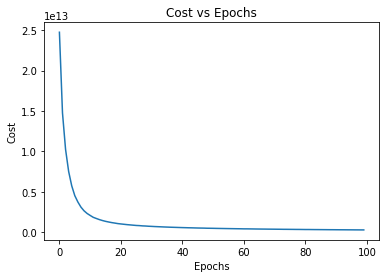

In [14]:
plt.plot(np.arange(100),cost_history)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost vs Epochs')
plt.show()

Variation of Model Performance with Varying Degrees

In [15]:
alpha = 0.6
lambda_ = 0
epochs = 100
degrees = [5,6,7,8,9]
models = []
j_train = []
j_cv = []
r2_train = []
r2_cv = []
for i,degree in enumerate(degrees):
    print(f'Degree: {degree}')
    x_train_poly = CreatePolynomialFeatures.poly_transform(x_train, degree)
    x_cv_poly = CreatePolynomialFeatures.poly_transform(x_cv, degree)

    scaler = StandardizationScale()
    x_train_scaled = scaler.fit_transform(x_train_poly)
    x_cv_scaled = scaler.transform(x_cv_poly)

    scaler2 = NormalizationScale()
    x_train_scaled = scaler2.fit_transform(x_train_scaled)
    x_cv_scaled = scaler2.fit_transform(x_cv_scaled)

    models.append(LinearRegression())
    models[i].fit(x_train_scaled, y_train,alpha, epochs, lambda_)

    yhat_train = models[i].predict(x_train_scaled)
    r2_train.append(Metrics.r2_score(yhat_train,y_train))
    j_train.append(Metrics.mean_square_error(yhat_train, y_train))

    yhat_cv = models[i].predict(x_cv_scaled)
    r2_cv.append(Metrics.r2_score(yhat_cv,y_cv))
    j_cv.append(Metrics.mean_square_error(yhat_cv, y_cv))


Degree: 5
Epoch  10 ⫸ Cost 9191970025754.840 ⫷
Epoch  20 ⫸ Cost 4688489530877.989 ⫷
Epoch  30 ⫸ Cost 3574919951222.531 ⫷
Epoch  40 ⫸ Cost 3267198536754.240 ⫷
Epoch  50 ⫸ Cost 3163372003509.645 ⫷
Epoch  60 ⫸ Cost 3128096730718.836 ⫷
Epoch  70 ⫸ Cost 3096361435049.082 ⫷
Epoch  80 ⫸ Cost 3100823430087.727 ⫷
Epoch  90 ⫸ Cost 3095111424320.359 ⫷
Epoch 100 ⫸ Cost 3078668287666.604 ⫷
Degree: 6
Epoch  10 ⫸ Cost 4267764899809.260 ⫷
Epoch  20 ⫸ Cost 1999860627324.880 ⫷
Epoch  30 ⫸ Cost 1490858887478.994 ⫷
Epoch  40 ⫸ Cost 1276822138244.055 ⫷
Epoch  50 ⫸ Cost 1133629553644.309 ⫷
Epoch  60 ⫸ Cost 1035982751929.770 ⫷
Epoch  70 ⫸ Cost  956647606345.559 ⫷
Epoch  80 ⫸ Cost  890785663480.886 ⫷
Epoch  90 ⫸ Cost  826546724329.449 ⫷
Epoch 100 ⫸ Cost  792431593527.974 ⫷
Degree: 7
Epoch  10 ⫸ Cost 4114162996799.055 ⫷
Epoch  20 ⫸ Cost 1889558976937.693 ⫷
Epoch  30 ⫸ Cost 1402279521381.836 ⫷
Epoch  40 ⫸ Cost 1198733170351.810 ⫷
Epoch  50 ⫸ Cost 1070986705746.513 ⫷
Epoch  60 ⫸ Cost  980727932294.013 ⫷
Epoch  7

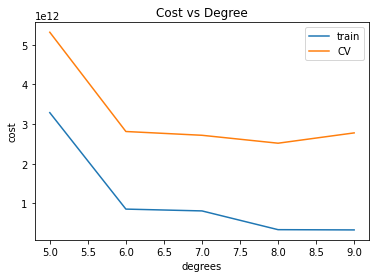

In [16]:
plt.plot(degrees, j_train, label="train")
plt.plot(degrees, j_cv, label='CV')
plt.xlabel('degrees')
plt.ylabel('cost')
plt.title('Cost vs Degree')
plt.legend()
plt.show()

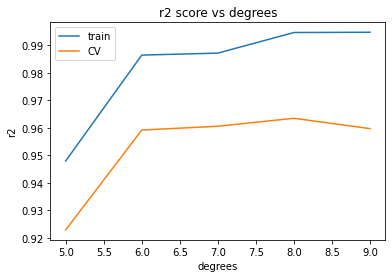

In [17]:
plt.plot(degrees, r2_train, label="train")
plt.plot(degrees, r2_cv, label='CV')
plt.xlabel('degrees')
plt.ylabel('r2')
plt.title('r2 score vs degrees')
plt.legend()
plt.show()

Variation of Model Performance with Varying Regularization Constant

In [20]:
alpha = 0.6
lambdas = [1e-12,1e-10,1e-8,1e-5,1e-2,1]
epochs = 100
degree = 8
models = []
j_train = []
j_cv = []
r2_train = []
r2_cv = []
for i,lambda_ in enumerate(lambdas):
    print(f'Lambda: {lambda_}')
    x_train_poly = CreatePolynomialFeatures.poly_transform(x_train, degree)
    x_cv_poly = CreatePolynomialFeatures.poly_transform(x_cv, degree)

    scaler = StandardizationScale()
    x_train_scaled = scaler.fit_transform(x_train_poly)
    x_cv_scaled = scaler.transform(x_cv_poly)

    scaler2 = NormalizationScale()
    x_train_scaled = scaler2.fit_transform(x_train_scaled)
    x_cv_scaled = scaler2.fit_transform(x_cv_scaled)

    models.append(LinearRegression())
    models[i].fit(x_train_scaled, y_train,alpha, epochs, lambda_)

    yhat_train = models[i].predict(x_train_scaled)
    r2_train.append(Metrics.r2_score(yhat_train,y_train))
    j_train.append(Metrics.mean_square_error(yhat_train, y_train))

    yhat_cv = models[i].predict(x_cv_scaled)
    r2_cv.append(Metrics.r2_score(yhat_cv,y_cv))
    j_cv.append(Metrics.mean_square_error(yhat_cv, y_cv))

Lambda: 1e-12
Epoch  10 ⫸ Cost 2862701140364.049 ⫷
Epoch  20 ⫸ Cost 1255278256267.218 ⫷
Epoch  30 ⫸ Cost  847362162335.628 ⫷
Epoch  40 ⫸ Cost  658391057246.623 ⫷
Epoch  50 ⫸ Cost  545561810645.216 ⫷
Epoch  60 ⫸ Cost  472918090834.531 ⫷
Epoch  70 ⫸ Cost  417791295407.007 ⫷
Epoch  80 ⫸ Cost  376632548000.761 ⫷
Epoch  90 ⫸ Cost  341027970640.631 ⫷
Epoch 100 ⫸ Cost  314922241895.029 ⫷
Lambda: 1e-10
Epoch  10 ⫸ Cost 2864232297098.294 ⫷
Epoch  20 ⫸ Cost 1250970518380.345 ⫷
Epoch  30 ⫸ Cost  849706399016.415 ⫷
Epoch  40 ⫸ Cost  658581108062.184 ⫷
Epoch  50 ⫸ Cost  548120147798.365 ⫷
Epoch  60 ⫸ Cost  473744594677.342 ⫷
Epoch  70 ⫸ Cost  419182496483.122 ⫷
Epoch  80 ⫸ Cost  377703470959.192 ⫷
Epoch  90 ⫸ Cost  343119476390.739 ⫷
Epoch 100 ⫸ Cost  314703318903.231 ⫷
Lambda: 1e-08
Epoch  10 ⫸ Cost 2863204634473.014 ⫷
Epoch  20 ⫸ Cost 1254452427327.246 ⫷
Epoch  30 ⫸ Cost  847257166424.457 ⫷
Epoch  40 ⫸ Cost  658819487861.072 ⫷
Epoch  50 ⫸ Cost  548233373325.017 ⫷
Epoch  60 ⫸ Cost  472180346828.45

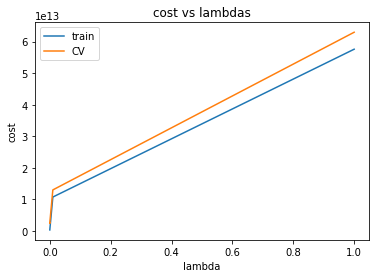

In [21]:
plt.plot(lambdas, j_train, label="train")
plt.plot(lambdas, j_cv, label='CV')
plt.xlabel('lambda')
plt.ylabel('cost')
plt.title('cost vs lambdas')
plt.legend()
plt.show()

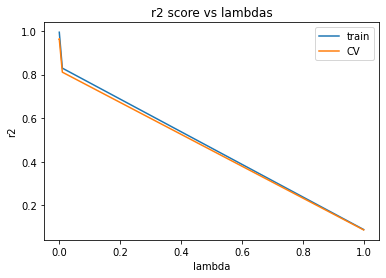

In [22]:
plt.plot(lambdas, r2_train, label="train")
plt.plot(lambdas, r2_cv, label='CV')
plt.xlabel('lambda')
plt.ylabel('r2')
plt.title('r2 score vs lambdas')
plt.legend()
plt.show()